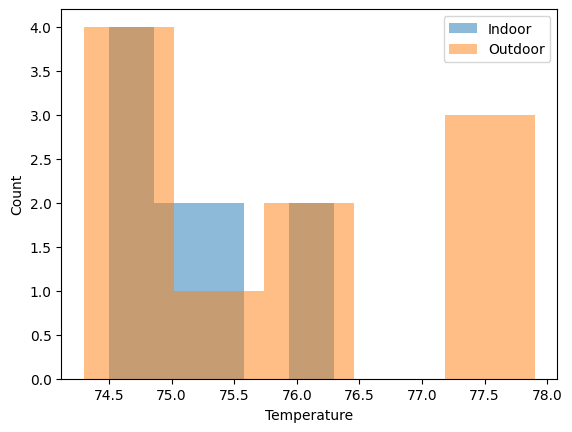

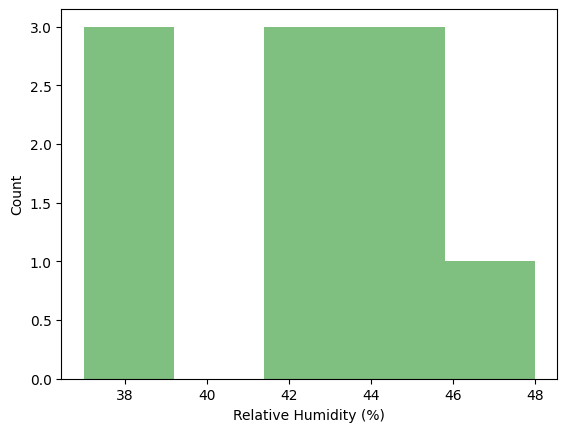

=== Means ===
Indoor Temperature:  75.22
Outdoor Temperature: 75.74
Humidity:            42.10

=== Variances ===
Indoor Temperature:  0.3551
Outdoor Temperature: 2.0627
Humidity:            12.9889

=== Standard Deviations ===
Indoor Temperature:  0.5959
Outdoor Temperature: 1.4362
Humidity:            3.6040


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the data (adjust filename/format as needed)
df = pd.read_csv("temp_hum_data_2025.csv")

# histograms
plt.hist(df['Inside Temperature (°F)'], bins=5, alpha=0.5, label='Indoor')
plt.hist(df['Outside Temperture (°F)'], bins=5, alpha=0.5, label='Outdoor')
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

plt.hist(df['Humidity (%)'], bins=5, alpha=0.5, color='green')
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Count")
plt.show()

# means
mean_indoor = df['Inside Temperature (°F)'].mean()
mean_outdoor = df['Outside Temperture (°F)'].mean()
mean_humidity = df['Humidity (%)'].mean()

# variances
var_indoor = df['Inside Temperature (°F)'].var(ddof=1)
var_outdoor = df['Outside Temperture (°F)'].var(ddof=1)
var_humidity = df['Humidity (%)'].var(ddof=1)

# std dev
std_indoor = df['Inside Temperature (°F)'].std(ddof=1)
std_outdoor = df['Outside Temperture (°F)'].std(ddof=1)
std_humidity = df['Humidity (%)'].std(ddof=1)

print("=== Means ===")
print(f"Indoor Temperature:  {mean_indoor:.2f}")
print(f"Outdoor Temperature: {mean_outdoor:.2f}")
print(f"Humidity:            {mean_humidity:.2f}")

print("\n=== Variances ===")
print(f"Indoor Temperature:  {var_indoor:.4f}")
print(f"Outdoor Temperature: {var_outdoor:.4f}")
print(f"Humidity:            {var_humidity:.4f}")

print("\n=== Standard Deviations ===")
print(f"Indoor Temperature:  {std_indoor:.4f}")
print(f"Outdoor Temperature: {std_outdoor:.4f}")
print(f"Humidity:            {std_humidity:.4f}")


In [11]:
# sensor fusion (weighted mean)
weights = [1/var_indoor, 1/var_outdoor]
fused_mean = (mean_indoor/var_indoor + mean_outdoor/var_outdoor) / (1/var_indoor + 1/var_outdoor)
fused_var = 1 / (1/var_indoor + 1/var_outdoor)
fused_std = np.sqrt(fused_var)

print("Fused mean:", fused_mean)
print("Fused variance:", fused_var)
print("Fused std:", fused_std)

Fused mean: 75.296375
Fused variance: 0.302954166666666
Fused std: 0.5504127239323834


In [ ]:
# heat index (first formula from Wikipedia)
T = fused_mean
R = mean_humidity
HI = -42.379 + 2.04901523*T + 10.14333127*R - 0.22475541*T*R \
     - 6.83783e-3*T**2 - 5.481717e-2*R**2 \
     + 1.22874e-3*T**2*R + 8.5282e-4*T*R**2 - 1.99e-6*T**2*R**2

print("Heat Index:", HI)

In [ ]:
# error propagation (approx, via partial derivatives)
dHI_dT = 2.04901523 - 0.22475541*R - 2*6.83783e-3*T + 2*1.22874e-3*T*R + 8.5282e-4*R**2 - 2*1.99e-6*T*R**2
dHI_dR = 10.14333127 - 0.22475541*T - 2*5.481717e-2*R + 1.22874e-3*T**2 + 2*8.5282e-4*T*R - 2*1.99e-6*T**2*R

var_HI = (dHI_dT**2)*fused_var + (dHI_dR**2)*var_humidity
std_HI = np.sqrt(var_HI)

print("Heat Index variance:", var_HI)
print("Heat Index std:", std_HI)
